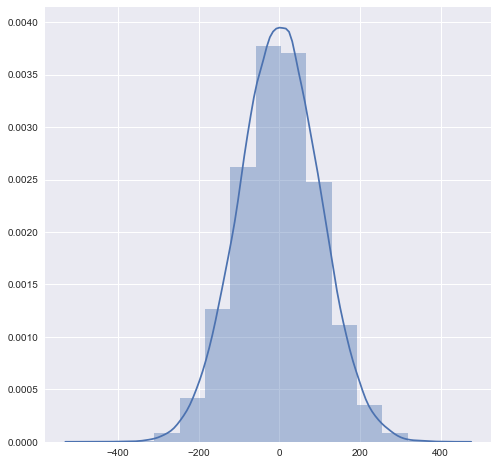

(100000,)


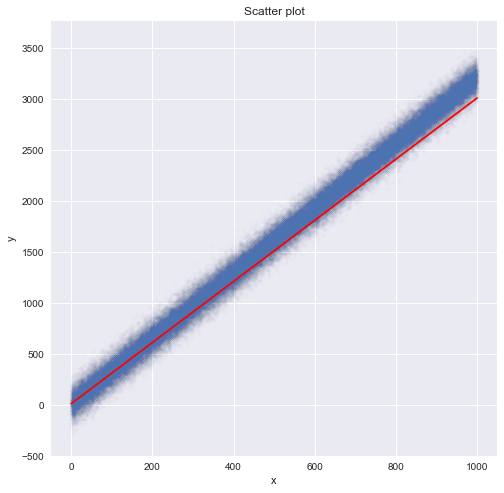

23593.0870639


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
mpl.rcParams['figure.figsize'] = (8,8)

# Create data
N = 100000
a = 3.2
b = 12.0
x = np.random.uniform(0,1000,N)
x = np.sort(x)
noise = np.random.normal(0, 100, N)
sns.distplot(noise, bins=15, kde=True)
plt.show()

y = a*x + b + noise

print y.shape
# Plot
plt.scatter(x, y, alpha=0.01, marker='.')
plt.title('Scatter plot')
plt.xlabel('x')
plt.ylabel('y')
#ax = plt.gca()
#ax.set_aspect('equal')

guessed_a = 3
guessed_b = 11

guessed_y = guessed_a * x + guessed_b
cool_y = np.log(x)
plt.plot(x, guessed_y, color='r')
plt.show()

# mean squared error
def cost_function(actual_y, model_y):
    return np.mean((actual_y - model_y)**2)
     

print cost_function(y, guessed_y)

In [3]:
# use a stupid brute force exhaustive search algorithm to find best a and b
possible_as = np.arange(0.5, 1.5, 0.01)
print possible_as
possible_bs = np.arange(6,8, 0.01)
print possible_bs


[ 0.5   0.51  0.52  0.53  0.54  0.55  0.56  0.57  0.58  0.59  0.6   0.61
  0.62  0.63  0.64  0.65  0.66  0.67  0.68  0.69  0.7   0.71  0.72  0.73
  0.74  0.75  0.76  0.77  0.78  0.79  0.8   0.81  0.82  0.83  0.84  0.85
  0.86  0.87  0.88  0.89  0.9   0.91  0.92  0.93  0.94  0.95  0.96  0.97
  0.98  0.99  1.    1.01  1.02  1.03  1.04  1.05  1.06  1.07  1.08  1.09
  1.1   1.11  1.12  1.13  1.14  1.15  1.16  1.17  1.18  1.19  1.2   1.21
  1.22  1.23  1.24  1.25  1.26  1.27  1.28  1.29  1.3   1.31  1.32  1.33
  1.34  1.35  1.36  1.37  1.38  1.39  1.4   1.41  1.42  1.43  1.44  1.45
  1.46  1.47  1.48  1.49]
[ 6.    6.01  6.02  6.03  6.04  6.05  6.06  6.07  6.08  6.09  6.1   6.11
  6.12  6.13  6.14  6.15  6.16  6.17  6.18  6.19  6.2   6.21  6.22  6.23
  6.24  6.25  6.26  6.27  6.28  6.29  6.3   6.31  6.32  6.33  6.34  6.35
  6.36  6.37  6.38  6.39  6.4   6.41  6.42  6.43  6.44  6.45  6.46  6.47
  6.48  6.49  6.5   6.51  6.52  6.53  6.54  6.55  6.56  6.57  6.58  6.59
  6.6   6.61  6.62  6.63 

In [4]:
best_cost = None
best_a = None
best_b = None

for a_candidate in possible_as:
    for b_candidate in possible_bs:
        guessed_y = a_candidate * x + b_candidate
        this_cost = cost_function(y, guessed_y)
        if not best_cost:
            best_cost = this_cost
            best_a = a_candidate
            best_b = b_candidate
        else:
            if this_cost < best_cost:
                best_cost = this_cost
                best_a = a_candidate
                best_b = b_candidate
                
print best_cost, best_a, best_b


1.01299696122 0.85 7.2


-4.46105219875


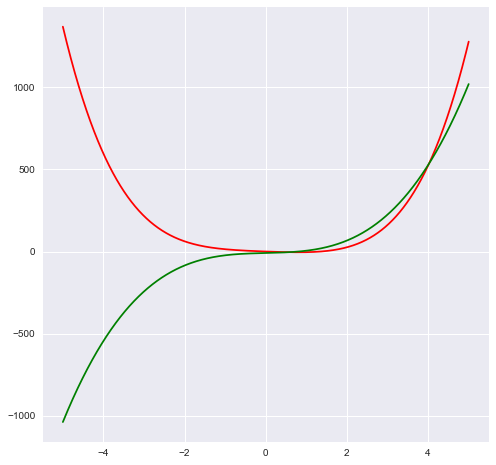

In [41]:
#let's plot a function curve

x = np.arange(-5, 5, 0.001)
y = 2*x**4 + 3*x**2 - 9*x
dy = 8*x**3 + 6*x - 9

print np.min(y)

plt.plot(x, y, color='r')
plt.plot(x, dy, color='g')

ax = plt.gca()
#ax.set_aspect('equal')
plt.show()


In [157]:
%time

import random

stopping_criteria = 1e-8
learning_rate = 0.01
max_iterations = 10000

rabbit_x = random.random()

# y = 2*x**4 + 3*x**2 - 9x


def derivative(x):
    return 8*x**3 + 6*x - 9

for i in xrange(max_iterations):
    old_rabbit_x = rabbit_x
    rabbit_x += -learning_rate*derivative(rabbit_x)
    if abs(rabbit_x - old_rabbit_x) < stopping_criteria:
        break

print rabbit_x

print 2*rabbit_x**4 + 3*rabbit_x**2 - 9*rabbit_x

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs
0.804847715171
-4.46105244851


In [195]:
%%time

scaling_factor = max(np.max(x), np.max(y))/10.0
print scaling_factor
x_scaled = x/scaling_factor
y_scaled = y/scaling_factor

def partial_derivative_b(a, b, x, y):
    return np.mean(2*a*x + 2*b - 2*y)

def partial_derivative_a(a, b, x, y):
    return np.mean((2*a*x + 2*b - 2*y)*x)
    
def cost_function(actual_y, model_y):
    return np.mean((actual_y - model_y)**2)

import random

stopping_criteria = 1e-8
learning_rate = 0.1
max_iterations = 100000

a = 0
b = 0


for i in xrange(max_iterations):
    old_a = a
    old_b = b
    
    a += -learning_rate*partial_derivative_a(old_a,old_b, x_scaled, y_scaled)
    b += -learning_rate*partial_derivative_b(old_a,old_b, x_scaled, y_scaled)
    
    if abs(old_a - a) < stopping_criteria and abs(old_b - b) < stopping_criteria:
       break


print i
print 'a = ', a
print 'b = ', b*scaling_factor



352.676888257
396
a =  3.19799249826
b =  13.1769644475
CPU times: user 337 ms, sys: 6.05 ms, total: 343 ms
Wall time: 341 ms
